## Implementation of Linear Regression

[Text(0.5, 0, 'Age'),
 Text(1.5, 0, 'Sex'),
 Text(2.5, 0, 'BMI'),
 Text(3.5, 0, 'BP'),
 Text(4.5, 0, 'Total Cholesterol'),
 Text(5.5, 0, 'LDL'),
 Text(6.5, 0, 'HDL'),
 Text(7.5, 0, 'Thyroid'),
 Text(8.5, 0, 'Glaucoma'),
 Text(9.5, 0, 'Glucose'),
 Text(10.5, 0, 'target')]

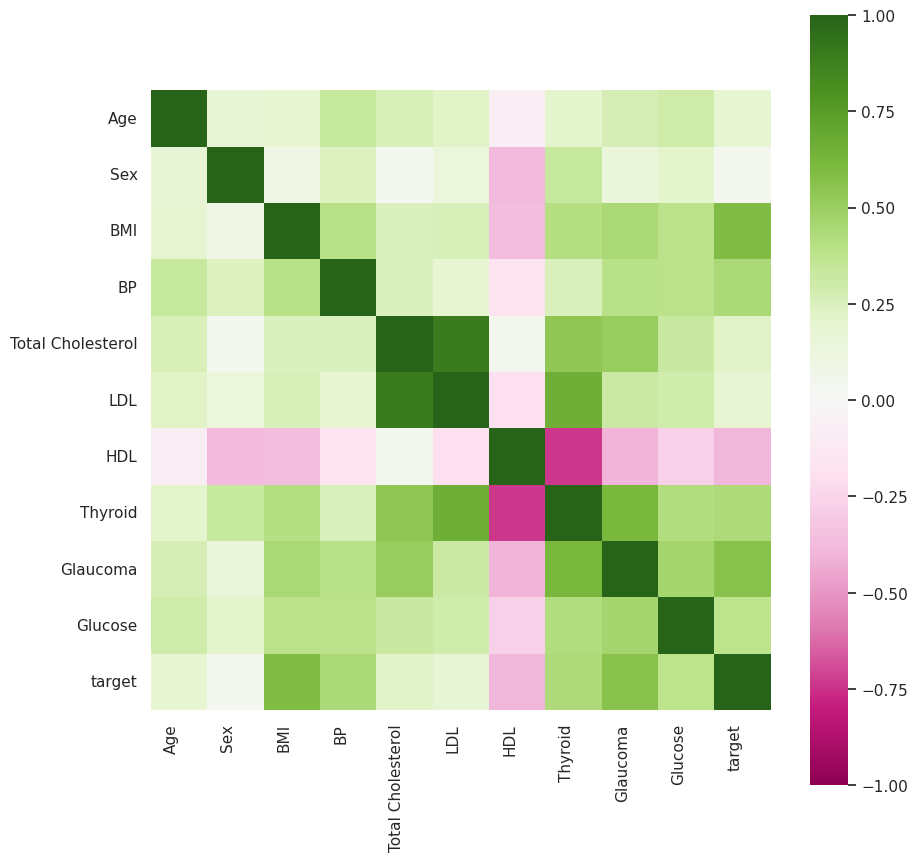

In [25]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes['data'], diabetes['target']
feature_rename = {'age': 'Age',
                  'sex': 'Sex',
                  'bmi': 'BMI',
                  'bp': 'BP',
                  's1': 'Total Cholesterol',
                  's2': 'LDL',
                  's3': 'HDL',
                  's4': 'Thyroid',
                  's5': 'Glaucoma',
                  's6': 'Glucose'}

# Rename features
df_data = pd.DataFrame(X, columns=diabetes['feature_names'])
df_data.rename(columns=feature_rename, inplace=True)
df_data['target'] = y

# Correlation matrix
corr = df_data.corr()

# Plot correlation heatmap
sns.set(style='whitegrid')
sns.set_palette('bright')
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap="PiYG",
    square=True,
    ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
)

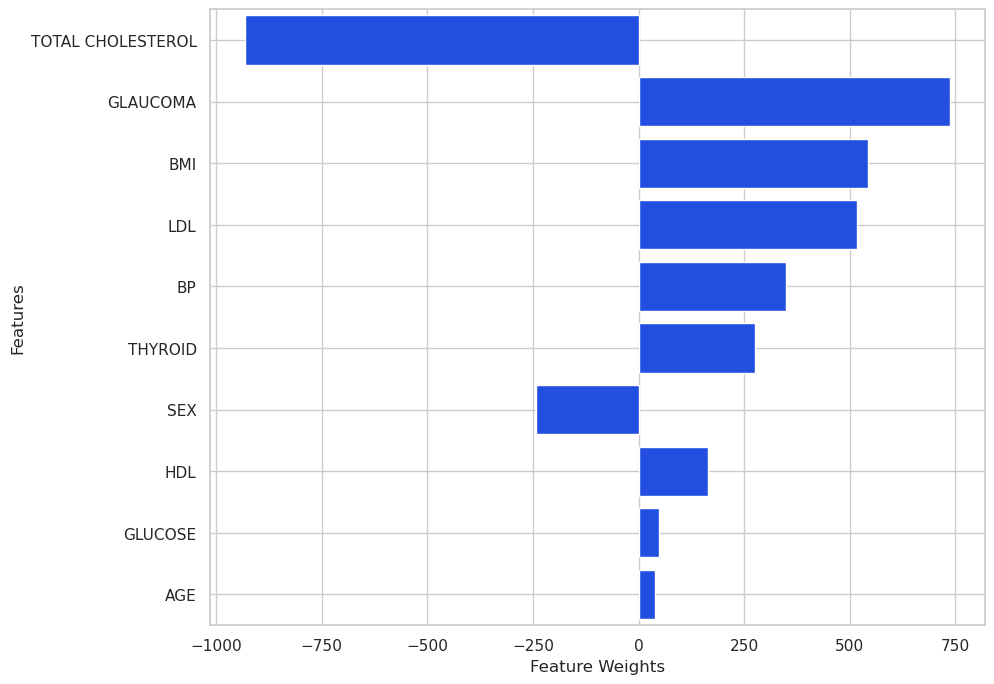

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
  test_size=0.2,
  random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

# Mean Absolute Error
mae = np.mean(np.abs(y_test - y_pred))

# Get feature names
feature_names = df_data.columns[:-1]

# Plot feature importance
weights = lr_model.coef_
feature_importance_idx = np.argsort(np.abs(weights))[::-1]
feature_importance = [feature_names[idx].upper() for idx in feature_importance_idx]
feature_importance_values = [weights[idx] for idx in feature_importance_idx]

f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=feature_importance_values, y=feature_importance, ax=ax)
ax.grid(True)
ax.set_xlabel('Feature Weights')
ax.set_ylabel('Features')

plt.show()